# Import
---

In [16]:
# building and evaluating
import tensorflow as tf

# plotting
import matplotlib.pyplot as plt

# confusing matrix
from sklearn.metrics import confusion_matrix 
import numpy as np
import itertools

# Data
---

In [2]:
# Prepare the data
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
print(X_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


# Model
---

In [6]:
# Build the model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

# Evaluate
print('Train accuracy: ', model.evaluate(X_train, y_train))
print('Test accuracy: ', model.evaluate(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2492 - accuracy: 0.9282 - val_loss: 0.1145 - val_accuracy: 0.9637
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1129 - accuracy: 0.9652 - val_loss: 0.0795 - val_accuracy: 0.9756
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0827 - accuracy: 0.9752 - val_loss: 0.0693 - val_accuracy: 0.9789
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0635 - accuracy: 0.9797 - val_loss: 0.0694 - val_accuracy: 0.9790
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0554 - accuracy: 0.9822 - val_loss: 0.0670 - val_accuracy: 0.9778
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0437 - accuracy: 0.9858 - val_loss: 0.0736 - val_accuracy: 0.9775
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0392 - accuracy: 0.9878 - val_loss: 0.0613 - val_accuracy:

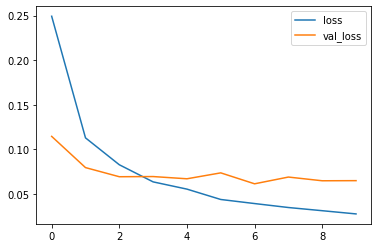

In [9]:
# Loss plot
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

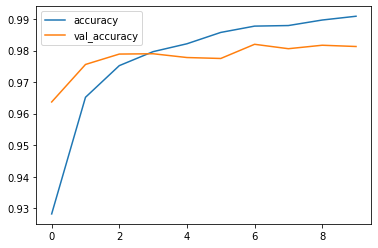

In [11]:
# Accuracy plot
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

confusion matrix without normalization
[[ 968    0    5    1    0    0    3    1    1    1]
 [   0 1127    3    0    0    0    1    1    3    0]
 [   0    1 1018    1    3    0    1    4    3    1]
 [   0    0    5  994    0    3    0    3    2    3]
 [   0    0    3    0  958    0    4    3    1   13]
 [   2    0    0   11    1  866    5    2    2    3]
 [   3    2    1    1    1    5  944    0    1    0]
 [   1    4    8    4    0    0    0 1007    2    2]
 [   3    0    4    5    4    1    1    4  950    2]
 [   0    4    1    3   10    3    0    4    3  981]]


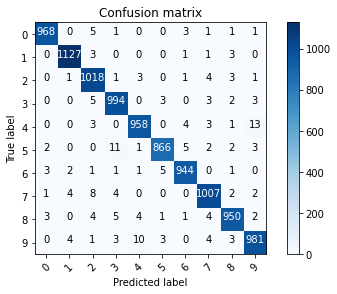

In [18]:
def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('normalized confusion matrix')
  else:
    print('confusion matrix without normalization')
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

P_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, P_test)
plot_confusion_matrix(cm, list(range(10)))

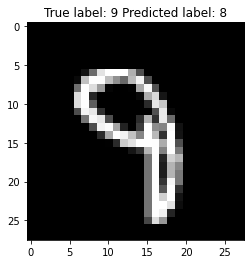

In [24]:
# show some misclasified  examples
misclassified_idx = np.where(P_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title(f'True label: {y_test[i]} Predicted label: {P_test[i]}');